In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv('walmart.csv')

In [85]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [86]:
df.shape

(6435, 8)

In [87]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [88]:
df.duplicated().sum()

np.int64(0)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# Univariate Analysis

In [90]:
df.head(1)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.9,0,42.31,2.572,211.096358,8.106


In [91]:
df['Store'].value_counts()

,count
Store,
1,143
2,143
3,143
4,143
5,143
6,143
7,143
8,143
9,143


In [92]:
print(143*45)

6435


=> 45 Stores in total, 143 entries from each

In [93]:
df.loc[df['Store'] == 2].head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
143,2,05-02-2010,2136989.46,0,40.19,2.572,210.752605,8.324
144,2,12-02-2010,2137809.50,1,38.49,2.548,210.897994,8.324
145,2,19-02-2010,2124451.54,0,39.69,2.514,210.945160,8.324
146,2,26-02-2010,1865097.27,0,46.10,2.561,210.975957,8.324
147,2,05-03-2010,1991013.13,0,47.17,2.625,211.006754,8.324


In [94]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [95]:
df['Date'].value_counts()

,count
Date,
2010-02-05,45
2010-02-12,45
2010-02-19,45
2010-02-26,45
2010-03-05,45
...,...
2012-09-28,45
2012-10-05,45
2012-10-12,45


In [96]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
#no need  for Day as we're working with weekly data, the date of collection doesnt matteer
df.drop(columns='Date', inplace=True)
df.sample(5)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
4943,35,897037.25,0,72.88,3.704,140.162953,8.684,8,2011
1454,11,1244390.03,0,84.57,2.608,214.556497,7.346,7,2010
6429,45,723086.20,0,65.32,4.038,191.856704,8.684,9,2012
4568,32,1126685.95,1,72.56,3.596,198.095048,7.872,9,2012
4324,31,1213981.64,0,70.28,2.603,211.329874,8.163,10,2010


In [97]:
df['Year'].value_counts()

,count
Year,
2011,2340
2010,2160
2012,1935


In [98]:
df2010 = df.loc[df['Year'] == 2010]
df2011 = df.loc[df['Year'] == 2011]
df2012 = df.loc[df['Year'] == 2012]

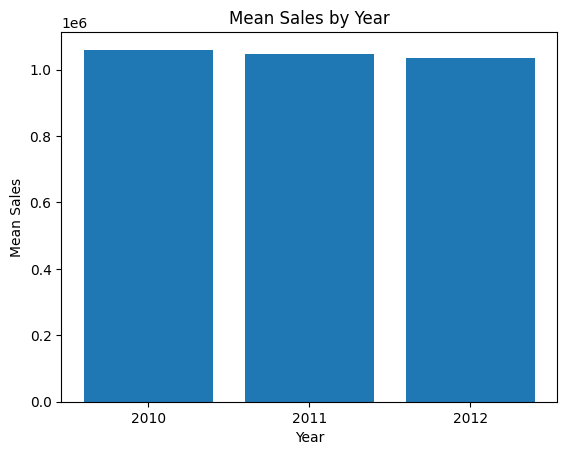

In [99]:
mean2010 =df2010['Weekly_Sales'].mean()
mean2011 = df2011['Weekly_Sales'].mean()
mean2012 = df2012['Weekly_Sales'].mean()

plt.bar(x=['2010', '2011', '2012'], height=[mean2010, mean2011,mean2012])
plt.xlabel('Year')
plt.ylabel('Mean Sales')
plt.title('Mean Sales by Year')
plt.show()

In [100]:
monthly10  = df2010.groupby('Month')['Weekly_Sales'].mean()
monthly11  = df2011.groupby('Month')['Weekly_Sales'].mean()
monthly12  = df2012.groupby('Month')['Weekly_Sales'].mean()

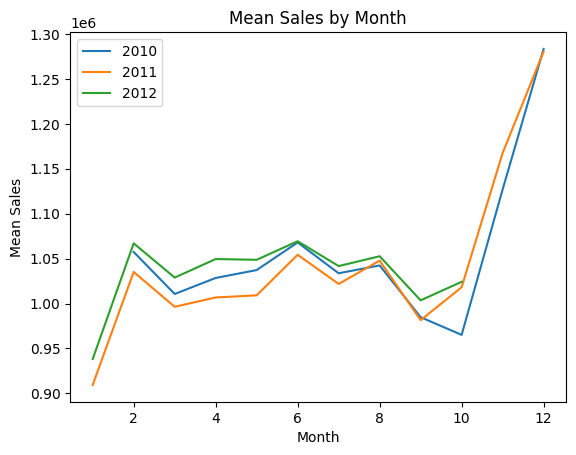

In [101]:
plt.plot(monthly10)
plt.plot(monthly11)
plt.plot(monthly12)

plt.xlabel('Month')
plt.ylabel('Mean Sales')
plt.title('Mean Sales by Month')
plt.legend(['2010', '2011', '2012'])
plt.show()

Clear monthly trends =. we'll keep month in features

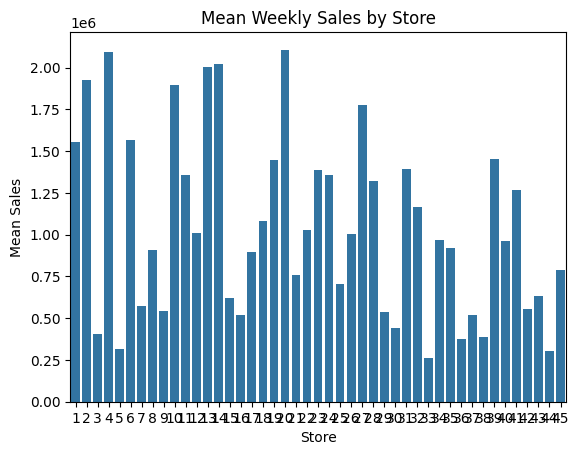

In [102]:
sns.barplot(df.groupby('Store')['Weekly_Sales'].mean())
plt.title('Mean Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Mean Sales')
plt.show()

Weekly mean sales varies quite a lot between stores, therefore we will keep it in the feature list



---



In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [104]:
df.sample(3)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
5816,41,1548661.45,0,17.05,3.331,195.874257,6.759,12,2011
6410,45,770487.37,0,61.24,3.889,190.976417,8.567,5,2012
1204,9,520962.14,0,56.12,3.524,218.445164,6.380,4,2011


# Modelling

In [105]:
X_train = df.loc[(df['Year'] == 2010) | (df['Year'] == 2011)].drop(columns=['Weekly_Sales','Year'])     #Data from 2010 and 2011 - training material
y_train = df.loc[(df['Year'] == 2010) | (df['Year'] == 2011)]['Weekly_Sales']


X_test = df.loc[df['Year'] == 2012].drop(columns=['Weekly_Sales','Year'])   #Data from 2012 - to be predicted
y_test = df.loc[df['Year'] == 2012]['Weekly_Sales']


In [106]:
X_train.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month
0,1,0,42.31,2.572,211.096358,8.106,2
1,1,1,38.51,2.548,211.242170,8.106,2
2,1,0,39.93,2.514,211.289143,8.106,2
3,1,0,46.63,2.561,211.319643,8.106,2
4,1,0,46.50,2.625,211.350143,8.106,3


Store - OHE

Hol - Passthru

Temp - SS

Fuel - SS

CPI - SS

Unem - SS

Month - OHE

In [107]:
y_train.head()

,Weekly_Sales
0,1643690.90
1,1641957.44
2,1611968.17
3,1409727.59
4,1554806.68


## Random Forest

In [108]:
ct1 = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), ['Store', 'Month']),
    #('ss', StandardScaler(), ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'])
], remainder='passthrough')


In [109]:
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=500,
    min_samples_split = 15,
    random_state=423
)


rf.fit(X_train, y_train)
y_predRF = rf.predict(X_test)


In [110]:
rfscore = (r2_score(y_test, y_predRF))

rfscore

0.718667457358581

In [111]:
y_test

,Weekly_Sales
100,1550369.92
101,1459601.17
102,1394393.84
103,1319325.59
104,1636339.65
...,...
6430,713173.95
6431,733455.07
6432,734464.36
6433,718125.53


In [112]:
y_predRF

array([1636710.60765277, 1637157.17613867, 1640214.57145096, ...,
        933705.52792819,  933705.52792819,  933262.71318819])



---



---



---



---



---



## Lin Reg Sklearn

We'll call the following block again just to ensure we're starting from scratch for each model

In [113]:
X_train = df.loc[(df['Year'] == 2010) | (df['Year'] == 2011)].drop(columns=['Weekly_Sales','Year'])     #Data from 2010 and 2011
y_train = df.loc[(df['Year'] == 2010) | (df['Year'] == 2011)]['Weekly_Sales']


X_test = df.loc[df['Year'] == 2012].drop(columns=['Weekly_Sales','Year'])   #Data from 2012
y_test = df.loc[df['Year'] == 2012]['Weekly_Sales']


In [114]:

ct2 = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), ['Store', 'Month']),
    ('ss', StandardScaler(), ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'])
], remainder='passthrough')



In [115]:

X_train = ct2.fit_transform(X_train)
X_test = ct2.transform(X_test)


In [116]:

ss = StandardScaler()
y_train = ss.fit_transform(np.array(y_train).reshape(-1,1))
y_test = ss.transform(np.array(y_test).reshape(-1,1))


In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
lr = LinearRegression()

lr.fit(X_train, y_train)
y_predLR = lr.predict(X_test)
lrscore = (r2_score(y_test, y_predLR))

lrscore

0.9624721703319818

In [119]:
y_predLR = ss.inverse_transform(y_predLR)



---



---



---



---



---



## Manual Linear Regression

We'll call the following block again just to ensure we're starting from scratch for each model

In [160]:
X_train = df.loc[(df['Year'] == 2010) | (df['Year'] == 2011)].drop(columns=['Weekly_Sales','Year'])     #Data from 2010 and 2011
y_train = df.loc[(df['Year'] == 2010) | (df['Year'] == 2011)]['Weekly_Sales']


X_test = df.loc[df['Year'] == 2012].drop(columns=['Weekly_Sales','Year'])   #Data from 2012
y_test = df.loc[df['Year'] == 2012]['Weekly_Sales']


In [161]:
ct3 = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), ['Store', 'Month']),
    ('ss', StandardScaler(), ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'])
], remainder='passthrough')

In [162]:
X_train = ct3.fit_transform(X_train)
X_test = ct3.transform(X_test)

In [163]:
ss = StandardScaler()
y_train = ss.fit_transform(np.array(y_train).reshape(-1,1))
y_test = ss.transform(np.array(y_test).reshape(-1,1))

In [164]:
coeff = np.zeros(X_train.shape[1] + 1) + 10
coeff = coeff.reshape(-1)

m = coeff[:-1].reshape(-1, 1)
b = coeff[-1]

L = 0.00001


In [165]:
errVec = []
i = 0
while True:
    y_pred = X_train @ m + b
    err = ((y_train - y_pred) ** 2).mean()

    DelM = 2 * (X_train.T @ (y_pred - y_train)) / X_train.shape[0]
    DelB = 2 * (y_pred - y_train).mean()

    mNew = m - L * DelM
    bNew = b - L * DelB

    errVec.append(err)
    m = mNew
    b = bNew
    i+=1
    if errVec[-1]/y_pred.mean() < 0.01:
      break

weights = [m, b]
i

321396

In [166]:
i

321396

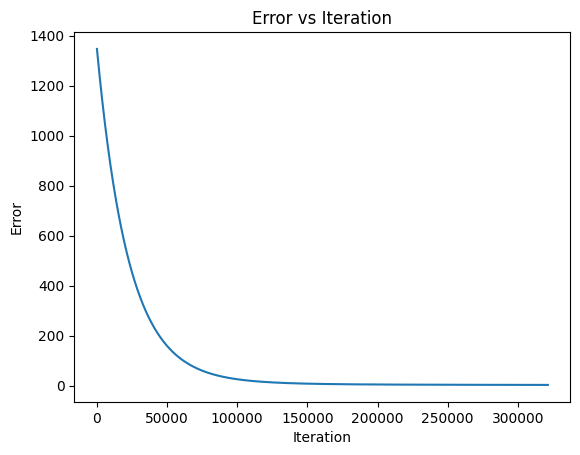

In [167]:
plt.plot(errVec)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error vs Iteration')
plt.show()


In [149]:
y_predManualLR = (X_test@m+b)
y_predManualLR = ss.inverse_transform(y_predManualLR.reshape(-1,1))

In [150]:
ss.inverse_transform(y_test)

array([[1550369.92],
       [1459601.17],
       [1394393.84],
       ...,
       [ 734464.36],
       [ 718125.53],
       [ 760281.43]])

## NN

We'll call the following block again just to ensure we're starting from scratch for each model

In [174]:
X_train = df.loc[(df['Year'] == 2010) | (df['Year'] == 2011)].drop(columns=['Weekly_Sales','Year'])     #Data from 2010 and 2011
y_train = df.loc[(df['Year'] == 2010) | (df['Year'] == 2011)]['Weekly_Sales']


X_test = df.loc[df['Year'] == 2012].drop(columns=['Weekly_Sales','Year'])   #Data from 2012
y_test = df.loc[df['Year'] == 2012]['Weekly_Sales']


In [175]:

ct3 = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), ['Store', 'Month']),
    ('ss', StandardScaler(), ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'])
], remainder='passthrough')



In [176]:

X_train = ct3.fit_transform(X_train)
X_test = ct3.transform(X_test)


In [177]:

ss = StandardScaler()
y_train = ss.fit_transform(np.array(y_train).reshape(-1,1))
y_test = ss.transform(np.array(y_test).reshape(-1,1))


In [178]:
import keras

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dense(1,activation = 'linear')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [179]:

model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [180]:

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.9970 - mae: 0.8171 - val_loss: 0.8459 - val_mae: 0.8096
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1067 - mae: 0.2139 - val_loss: 0.6927 - val_mae: 0.7421
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0692 - mae: 0.1597 - val_loss: 0.7060 - val_mae: 0.7477
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0648 - mae: 0.1469 - val_loss: 0.6423 - val_mae: 0.7106
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0504 - mae: 0.1371 - val_loss: 0.6674 - val_mae: 0.7244
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0464 - mae: 0.1311 - val_loss: 0.6496 - val_mae: 0.7076
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0472 - mae: 0.1316 - val_loss: 0.7297 - val_mae: 0.7545
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0407 - mae: 0.1200 - val_loss: 0.6483 - val_mae: 0.7077
Epoch 9/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/

In [181]:

nnscore = r2_score(y_test, model.predict(X_test))
nnscore

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


0.7385729445788998

In [182]:

y_predNN = model.predict(X_test)


61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [183]:

y_predNN.shape


(1935, 1)

In [184]:

y_predNN = ss.inverse_transform(y_predNN)


# Plotting

In [185]:
df2012['Pred NN'] = y_predNN
df2012['Pred RF'] = y_predRF
df2012['Pred LR'] = y_predLR
df2012['Manual LR'] = y_predManualLR
df2012.sample(5)

/tmp/ipython-input-185-2834109102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2012['Pred NN'] = y_predNN
/tmp/ipython-input-185-2834109102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2012['Pred RF'] = y_predRF
/tmp/ipython-input-185-2834109102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Pred RF,Pred LR,Manual LR,Pred NN
2824,20,2045837.55,0,39.79,3.739,213.472512,6.961,2,2012,2.215946e+06,2.131971e+06,1.113913e+06,1.787338e+06
2263,16,479855.00,0,53.57,3.870,197.548161,6.169,5,2012,5.741339e+05,5.139850e+05,8.637044e+05,4.919892e+05
2569,18,1002856.20,0,58.24,4.018,138.739500,8.535,9,2012,9.710866e+05,1.028358e+06,5.149918e+05,7.910550e+05
960,7,578002.85,0,27.41,3.055,196.779665,8.256,1,2012,8.138426e+05,4.660264e+05,1.204771e+06,5.163756e+05
5992,42,516352.21,0,83.98,3.769,130.719581,7.170,7,2012,5.579728e+05,5.637295e+05,7.693176e+05,1.225485e+06


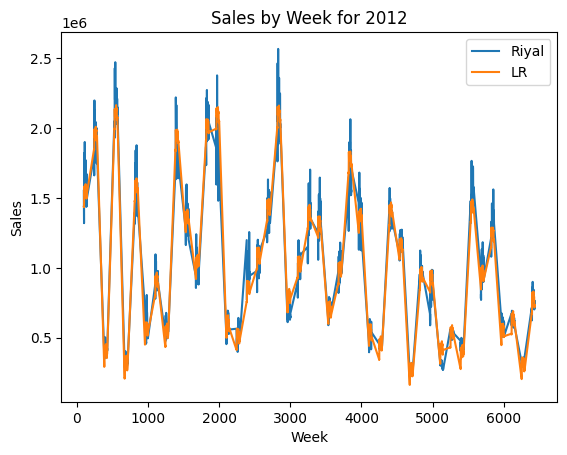

In [187]:
plt.plot(df2012['Weekly_Sales'])
plt.plot(df2012['Pred LR'])

plt.xlabel('Week')
plt.ylabel('Sales')
plt.title('Sales by Week for 2012')
plt.legend(['Riyal','LR'])
plt.show()

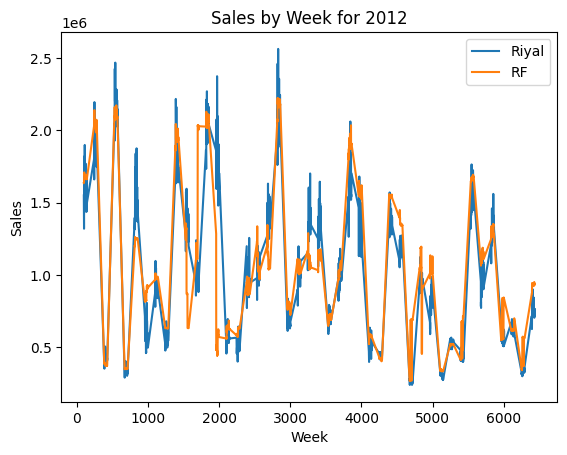

In [189]:
plt.plot(df2012['Weekly_Sales'])
plt.plot(df2012['Pred RF'])

plt.xlabel('Week')
plt.ylabel('Sales')
plt.title('Sales by Week for 2012')
plt.legend(['Riyal','RF'])
plt.show()

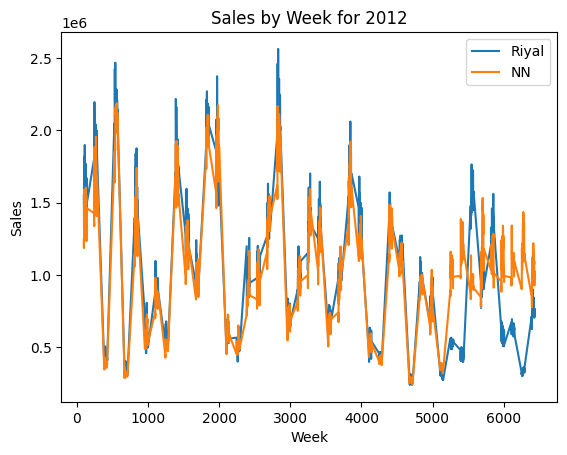

In [188]:
plt.plot(df2012['Weekly_Sales'])
plt.plot(df2012['Pred NN'])

plt.xlabel('Week')
plt.ylabel('Sales')
plt.title('Sales by Week for 2012')
plt.legend(['Riyal','NN'])
plt.show()